# Generate Gaussian Mixture

This create the sample used to demonstrate the 2-dimensional kernel density estimation (KDE).

/Users/roy/Applications/miniconda3/envs/othdr/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


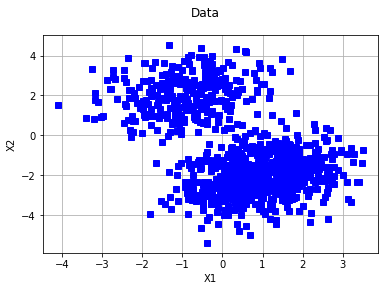

In [1]:
%matplotlib inline
import openturns as ot
from openturns import (Graph, Cloud)
from openturns.viewer import View

# Create a Funky distribution
corr = ot.CorrelationMatrix(2)
corr[0, 1] = 0.2
copula = ot.NormalCopula(corr)
x1 = ot.Normal(-1., 1)
x2 = ot.Normal(2, 1)
x_funk = ot.ComposedDistribution([x1, x2], copula)

# Create a Punk distribution
x1 = ot.Normal(1.,1)
x2 = ot.Normal(-2,1)
x_punk = ot.ComposedDistribution([x1, x2], copula)

# Merge the distributions
mixture = ot.Mixture([x_funk, x_punk], [0.5,1.])

# Sample from the mixture
ns = 1000
sample = mixture.getSample(ns)

# Draw a scatter plot
graph = Graph("Data", "X1", "X2", True, '')
cloud = Cloud(sample, 'blue', 'fsquare', 'My Cloud')
graph.add(cloud)
View(graph).show()

sample.exportToCSVFile("gauss-mixture.csv")